# Parse Antibiotic Resistance Ontology (ARO)

In [7]:
from ddot import Ontology
import ddot
from obo_aro import parse_obo
import pandas as pd
import sys
sys.path.append('.')
%matplotlib inline

# our ontology
ont2 = Ontology.from_table('/home/hermuba/data0118/network1122/candidate_ontologies')

# parse antibiotic resistance ontology (ARO)
parse_obo('/home/hermuba/data0118/ontologies/aro.obo', '/home/hermuba/data0118/ontologies/aro_output')

/home/hermuba/resistanceExp/visualization/exp12_Ontology/obo_aro.py:116: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  pd.Series(id2name).to_csv(id2name_file, sep='\t')
/home/hermuba/resistanceExp/visualization/exp12_Ontology/obo_aro.py:117: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  pd.Series(id2namespace).to_csv(id2namespace_file, sep='\t')
/home/hermuba/resistanceExp/visualization/exp12_Ontology/obo_aro.py:118: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  pd.Serie

## Create gene-term mapping

In [9]:
gold_anno = pd.read_pickle('/home/hermuba/data0118/goldstandard/ec_rmplasmid_node_anno_df')
new_res_genes = gold_anno.loc[ont2.genes] 

In [10]:
# combine loose and strict ARO into Gene-Term Table
new_res_genes['strict_ARO'].count()

96

In [11]:
new_res_genes['loose_ARO'].count()

238

In [8]:
def gene_term_table(new_res_genes, term):
    term_table = pd.DataFrame()
    term_index = 0
    
        

In [12]:
aro = new_res_genes['strict_ARO'].dropna().append(new_res_genes['loose_ARO'].dropna()) # when has strict card, won't have loose card
# generate gene_term list: one gene-term per row
aro_list = []
for gene in aro.index:
    aro_many = aro[gene].split(', ')
    for aro_term in aro_many:
        aro_list.append((gene, aro_term))

In [13]:
gene_term_mapping = pd.DataFrame(aro_list, columns = ['gene', 'aro_term'])
gene_term_mapping.head()

,gene,aro_term
0,562.10576.con.0029_46|562.10576,ARO:3003689
1,562.10576.con.0045_7|562.10576,ARO:3002655
2,562.10576.con.0045_9|562.10576,ARO:3002539
3,562.10576.con.0047_4|562.10576,ARO:3002705
4,562.22437.con.0041_3|562.22437,ARO:3002858


# Construct ARO in ddot

In [14]:
aro_ontology = Ontology.from_table('/home/hermuba/data0118/ontologies/aro_output', mapping = gene_term_mapping, mapping_parent = 'aro_term', mapping_child = 'gene')

/home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/ddot/Ontology.py:1606: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  table = pd.read_table(table, comment='#', header=header)
/home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/ddot/Ontology.py:1630: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  mapping = pd.read_table(mapping, comment='#', header=header)


In [15]:
aro_ontology

334 genes, 4096 terms, 9539 gene-term relations, 7810 term-term relations
node_attributes: []
edge_attributes: ['antibiotic_resistance', 'is_a']

# Align our ontology to ARO

In [16]:
# align CliXO to ARO
align_aro = ont2.align(aro_ontology)

collapse command: /home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/ddot/alignOntology/collapseRedundantNodes /tmp/tmpfrx9sgb9


/home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/ddot/Ontology.py:713: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  names=['Child', 'Parent'])


collapse command: /home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/ddot/alignOntology/collapseRedundantNodes /tmp/tmp9xdr9bem
Alignment command: /home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/ddot/alignOntology/calculateFDRs /tmp/tmpnbnzapt_ /tmp/tmp2jc0n3jy 0.05 criss_cross /tmp/tmpnun71ac6 100 40 gene


/home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/ddot/Ontology.py:150: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  header=None)


In [17]:
align_aro.head()

,Term,Similarity,FDR
Term,,,
S:582,ARO:3002804,0.905955,0.0
S:590,ARO:3002594,0.884570,0.0
S:589,ARO:3002660,0.883425,0.0
S:608,ARO:3000676,0.879019,0.0
S:630,ARO:3004126,0.878897,0.0


In [18]:
align_aro.shape

(180, 3)

In [19]:
align_aro.index.name = None

In [20]:
align_aro.reset_index(inplace = True)

# Statistics of this alignment

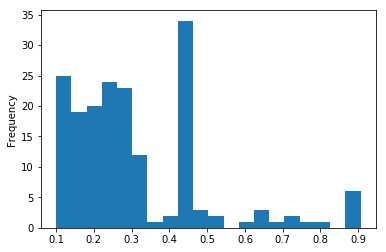

In [21]:
align_aro['Similarity'].plot.hist(bins = 20) # most are with low similarity

In [22]:
align_aro['FDR'].max() #weird

0.0

# Annotate those Terms with ARO's annotation

In [23]:
aro_name = pd.read_csv('~/data0118/ontologies/aro.tsv', header = 0, sep = '\t')

In [24]:
aro_name.head()

,Accession,Name,Description
0,ARO:0000000,macrolide antibiotic,Macrolides are a group of drugs (typically ant...
1,ARO:0000001,fluoroquinolone antibiotic,The fluoroquinolones are a family of synthetic...
2,ARO:0000002,tetracycline-resistant ribosomal protection pr...,A family of proteins known to bind to the 30S ...
3,ARO:0000003,astromicin,Astromicin is an aminoglycoside antibiotic use...
4,ARO:0000004,monobactam,Monobactams are a class of beta-lactam antibio...


In [25]:
align_aro = align_aro.merge(aro_name, left_on = 'Term', right_on = 'Accession', how = 'inner')

# use the aligned terms to annotate out ontology

In [26]:
align_aro.to_csv('~/data0118/network1122/candidate_ontologies_term_anno.csv')

# Show case some ontology

In [27]:
align_aro.set_index('index', inplace = True)
align_aro.head()

,Term,Similarity,FDR,Accession,Name,Description
index,,,,,,
S:582,ARO:3002804,0.905955,0.0,ARO:3002804,FosA2,An enzyme that confers resistance to fosfomyci...
S:590,ARO:3002594,0.884570,0.0,ARO:3002594,AAC(6')-IIa,AAC(6')-IIa is an aminoglycoside acetyltransfe...
S:589,ARO:3002660,0.883425,0.0,ARO:3002660,APH(6)-Id,APH(6)-Id is an aminoglycoside phosphotransfer...
S:608,ARO:3000676,0.879019,0.0,ARO:3000676,H-NS,H-NS is a histone-like protein involved in glo...
S:630,ARO:3004126,0.878897,0.0,ARO:3004126,Escherichia coli LamB,LamB is a negative regulator for antibiotic re...


# Create some domain statistics for this branch

# resfam

In [38]:
resfam_metadata = resfam_metadata.sort_values(by = 'count', ascending = False)

In [39]:
resfam_metadata.to_csv(root_dir + 's787_resfam.csv')